In [1]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.0 MB/s 


In [2]:
%ls

'전력+사용량(용도별)_20221130163857.csv'   sample_data/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
use_elec_pd = pd.read_csv('전력+사용량(용도별)_20221130163857.csv', header=[0,1,2,3])

In [5]:
columns = '소계	 소계	 소계	 소계	 전철	 수도	 사업자용	 순수서비스	 소계	 농립어업	 광업	 제조업	 소계	 소계	 소계	 소계	 전철	 수도	 사업자용	 순수서비스	 소계	 농립어업	 광업	 제조업	 소계	 소계	 소계	 소계	 전철	 수도	 사업자용	 순수서비스	 소계	 농립어업	 광업	 제조업'.split('\t ')

In [6]:
columns = set([c[0] for idx, c in enumerate(use_elec_pd.columns) if idx>=3])
columns

{'2021. 10', '2021. 11', '2021. 12'}

In [7]:
total_list = [use_elec_pd[i]['합계']['소계']['소계'][0] for i in columns]

In [8]:
total_list

[3537141, 3963700, 3578614]

In [9]:
from collections import defaultdict
kind_elect = defaultdict(list)
total = []
index = []
for date in columns:
  index.append(date)
  total.append(use_elec_pd[date]['합계']['소계']['소계'][0])
  sec_columns = use_elec_pd[date]['합계'].columns
  sec_columns = set([value[0] for idx,value in enumerate(sec_columns) if value!='소계'])
  # print(sec_columns)
  
  for kind in sec_columns:
    if kind != '소계':
      kind_elect[kind].append(use_elec_pd[date]['합계'][kind]['소계'][0])

In [10]:
index, total, kind_elect

(['2021. 11', '2021. 12', '2021. 10'],
 [3537141, 3963700, 3578614],
 defaultdict(list,
             {'산업용': [115192, 128338, 110820],
              '서비스업': [2050450, 2352648, 2107191],
              '가정용': [1101163, 1146475, 1106205],
              '공공용': [270336, 336239, 254397]}))

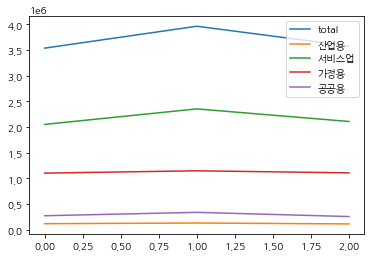

In [11]:
import matplotlib.pyplot as plt
plt.plot(total, label='total')
for key, value in kind_elect.items():
  plt.plot(value, label=key)
plt.legend()
plt.show()